# Reading Habits - Part 1 -  Statistics
This notebook provides simply information about my reading habits based on a .xlsx file using Pandas. 
Other excercies will try to fill in "Category" and "number of pages" using automated methods. This will still be considered "Ground Truth".   

In [423]:
import pandas as pd

df = pd.read_excel("data/Books_Oct_to_Oct.xlsx")
df.head()

,Title,Author,Type,Pages,Genre
0,The Rider,Tim Krabbè,Book,126,Fiction
1,The Martian,Andy Weir,Book,369,Science Fiction
2,Daemon,Daniel Suarez,Book,444,Science Fiction
3,The Phoenix Project,"Gene Kim, Kevin Behr, George Spafford",Audio,345,Business Management
4,Freedom,Daniel Suarez,Book,416,Science Fiction


## Overview of Information I want to Extract with Pandas

- 1. How many Pages Consumed in Total
- 2. How many pages read / listended too
- 3. Barplot of Generes/Pages
- 4. Genres/Books

In [448]:

# 1 - Pages 
numberOfPages = df['Pages'].sum()
print("You've consumed", int(numberOfPages), "Pages the last 12 months,")

# 2 - By Type
pagesRead = df[df['Type']=='Book']['Pages'].sum()
pagesListened = df[df['Type'] == 'Audio']['Pages'].sum()
print("of which you have read %d pages and listended to %d pages over %d books" % (pagesRead, pagesListened, len(df)))



You've consumed 9947 Pages the last 12 months,
of which you have read 3862 pages and listended to 6085 pages over 27 books


In [425]:
numBooks = df.shape[0]
numGenres = len(df['Genre'].unique())
#numGenres = len(df['Genre'].unique())

print("You have consumed %d books in %d different genres" % (numBooks, numGenres))

You have consumed 27 books in 14 different genres


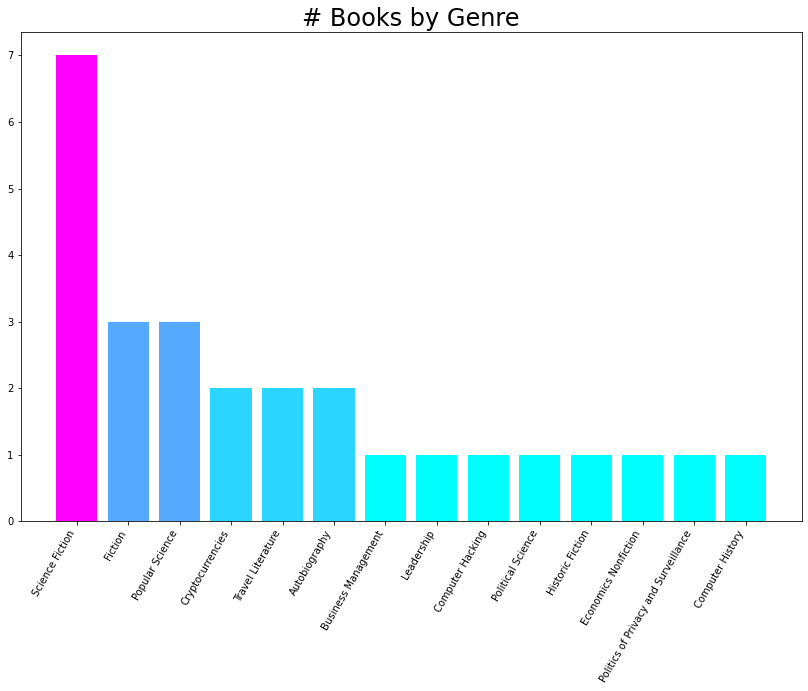

In [426]:
import matplotlib.pyplot as plt

#print(df.Genre.value_counts())      # Returns Sorted Serie
#print(df.groupby('Genre').count())  # Returns DF  
dfSerie = df['Genre'].value_counts()  # With Genre as Index and Value as Occurences


fig, ax = plt.subplots(figsize = (14, 9))

my_cmap = plt.get_cmap("cool")
rescale = lambda y: (y - min(y)) / (max(y) - min(y))
plt.bar(dfSerie.index, dfSerie.values, color=my_cmap(rescale(dfSerie)), label="Books")
plt.title("# Books by Genre", fontsize=24)
plt.xticks(rotation=60, ha='right')
plt.show()


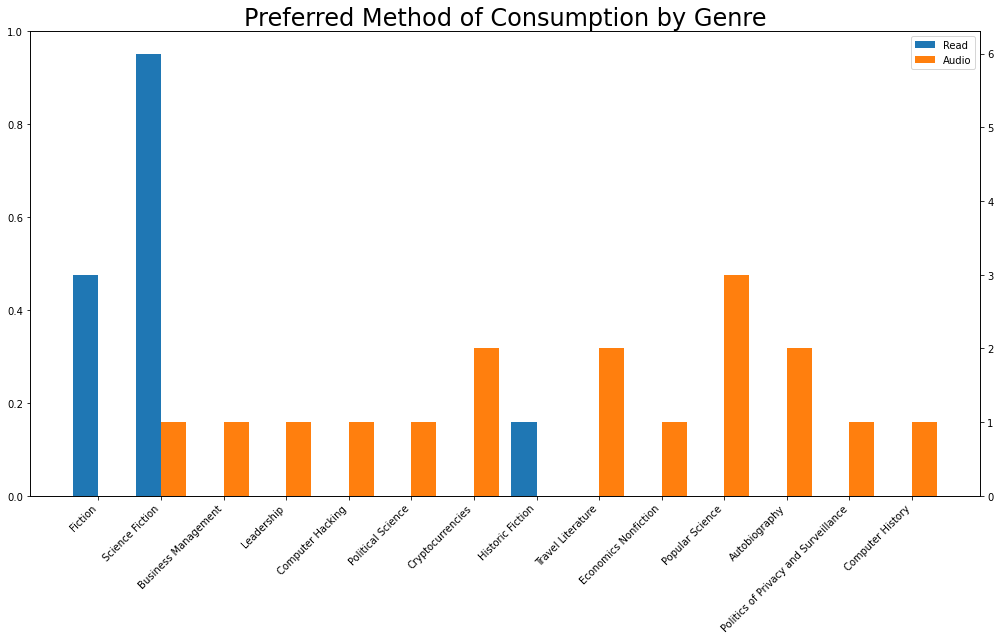

In [427]:
import matplotlib.pyplot as plt
import seaborn as sns

# Not by Pandas
#flattendDict = dict.fromkeys(df['Genre'].unique()])
genreStats = {x: [0,0,0,0] for x in df['Genre'].unique()}
for i, row in df.iterrows():
    genreStats[row['Genre']][0] += 1              # Books
    genreStats[row['Genre']][1] += row.Pages      # Pages
    if row.Type == 'Book':
        genreStats[row['Genre']][2] += 1          # Read
    else:
        genreStats[row['Genre']][3] += 1          # Listened

# Unpack
keys = [key for key in genreStats.keys()]
books = [value[0] for value in genreStats.values()]
pages = [value[1] for value in genreStats.values()]
read = [value[2] for value in genreStats.values()]
listen = [value[3] for value in genreStats.values()]

fig, ax = plt.subplots(figsize=(14,9))
ax2 = ax.twinx()

import numpy as np
x_axis = np.arange(len(keys))

plt.title("Preferred Method of Consumption by Genre", fontsize=24)
plt.bar(x_axis -0.2, read, width=0.4, label = 'Read')
plt.bar(x_axis +0.2, listen, width=0.4, label = 'Audio')
plt.xticks(x_axis, keys, rotation=60, ha='right')
#plt.xticks(rotation=60, ha='right')
fig.autofmt_xdate(rotation=45)


#plt.xticks(rotation=60, ha='right')
plt.legend()

#sns.barplot(x=keys, y=books, ax=ax)
#sns.barplot(x = keys, y=pages, width=0.3, ax=ax2)
#ax.bar(x=keys, height=books, width=0.2, color='blue')
#ax.bar(x=keys, height=pages, width=0.2, color='red')
#plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


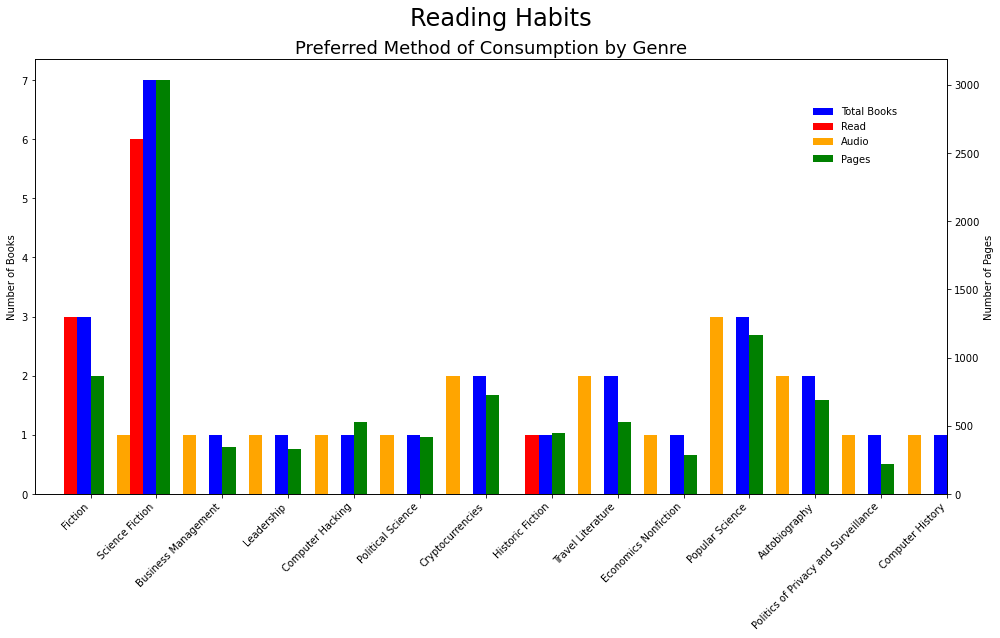

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

# Not by Pandas
#flattendDict = dict.fromkeys(df['Genre'].unique()])
genreStats = {x: [0,0,0,0] for x in df['Genre'].unique()}
for i, row in df.iterrows():
    genreStats[row['Genre']][0] += 1              # Books
    genreStats[row['Genre']][1] += row.Pages      # Pages
    if row.Type == 'Book':
        genreStats[row['Genre']][2] += 1          # Read
    else:
        genreStats[row['Genre']][3] += 1          # Listened

# Unpack
keys = [key for key in genreStats.keys()]
books = [value[0] for value in genreStats.values()]
pages = [value[1] for value in genreStats.values()]
read = [value[2] for value in genreStats.values()]
listen = [value[3] for value in genreStats.values()]
df_plot = pd.DataFrame({'Genre':keys,'Total_Books':books,'Pages':pages, 'Read':read, 'Audio':listen})

# Combine to a dataframe so use with seaborn
fig, ax = plt.subplots(figsize=(14, 9))
ax2 = ax.twinx()


plot1 = df_plot.Pages.plot(kind='bar', width=0.2, ax=ax2, position=0, color='green', label='Pages')
plot2 = df_plot.Total_Books.plot(kind='bar', width=0.2, ax=ax, position=1, color='blue', label='Total Books')
plot3 = df_plot.Read.plot(kind='bar', width=0.2, ax=ax, position=2, color='red', label='Read')
plot4 = df_plot.Audio.plot(kind='bar', width=0.2, ax=ax, position=3, color='orange',label='Audio')

#lns = plot1
#labs = [l.get_label() for l in lns]
ax.legend(loc=0, bbox_to_anchor= (.95, 0.9), ncol=1,
            borderaxespad=0, frameon=False)
ax2.legend(loc=0, bbox_to_anchor= (.92, 0.79), ncol=1,
            borderaxespad=0, frameon=False)

#ax.legend(plot1.artists[0])
#plt.legend()ax.legend(handles=lns, loc=0)

ax.set_ylabel(r"Number of Books")
ax2.set_ylabel(r"Number of Pages")

import numpy as np
x_axis = np.arange(len(keys))
plt.xticks(x_axis, keys, rotation=60, ha='right')
fig.autofmt_xdate(rotation=45)

plt.suptitle("Reading Habits", fontsize=24)
plt.title("Preferred Method of Consumption by Genre", fontsize=18)
plt.tight_layout()
plt.show()

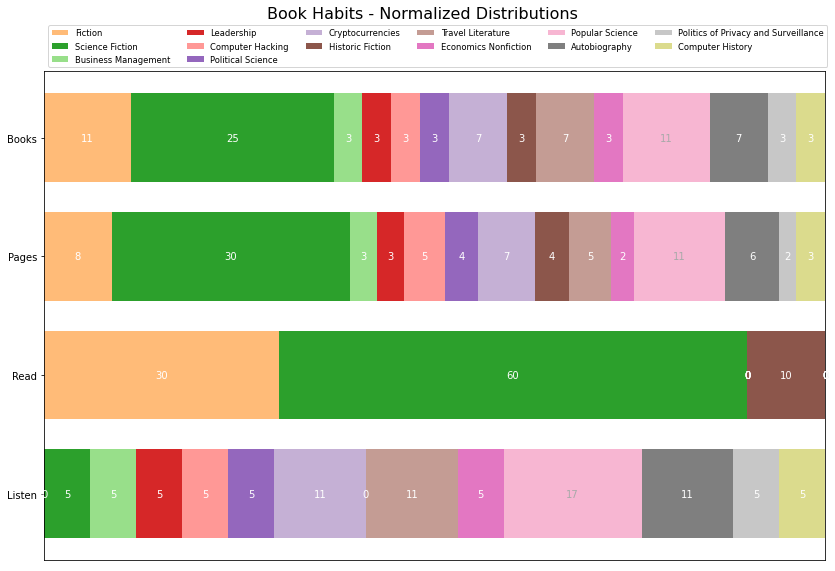

In [429]:
# Lets try Survey

def survey(results, category_names):

    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('tab20')(     #'RdYlGn'
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(14, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.75,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)

    ax.legend(ncol=6, bbox_to_anchor=(0, .9995),
              loc='lower left', fontsize='small')


    return fig, ax

# Normalize 
category_names = keys
pages = [p*.01 for p in pages]
results = {'Books':books,'Pages':pages, 'Read':read, 'Listen':listen}
for key in results.keys():
    length = sum(results[key])
    results[key] = [100.0*(p/length) for p in results[key]]

survey(results, category_names)
#plt.title("lol")
plt.suptitle("Book Habits - Normalized Distributions", fontsize=16)
plt.show()

In [430]:
df.head()

,Title,Author,Type,Pages,Genre
0,The Rider,Tim Krabbè,Book,126,Fiction
1,The Martian,Andy Weir,Book,369,Science Fiction
2,Daemon,Daniel Suarez,Book,444,Science Fiction
3,The Phoenix Project,"Gene Kim, Kevin Behr, George Spafford",Audio,345,Business Management
4,Freedom,Daniel Suarez,Book,416,Science Fiction


In [447]:
#df['Read'] = len(df.Type=='Book') #len(df.loc[df['Type'] == 'Book'])
#df['Nope'] = "lol"

df['Read'],df['Audio'] = 0,0
df["Read"][df['Type'].str.contains("Book")] = 1
df["Audio"][df['Type'].str.contains("Audio")] = 1

byGenre = df.groupby(by='Genre')
a = byGenre.aggregate({'Pages':'sum', 'Genre':'count', 'Read':'sum', 'Audio':'sum'})

a.head(14)
#plot = a.to_dict()
#print(plot)

C:\Users\ebbes\AppData\Local\Temp/ipykernel_308/2713570441.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Read"][df['Type'].str.contains("Book")] = 1
C:\Users\ebbes\AppData\Local\Temp/ipykernel_308/2713570441.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Audio"][df['Type'].str.contains("Audio")] = 1


,Pages,Genre,Read,Audio
Genre,,,,
Autobiography,688,2,0,2
Business Management,345,1,0,1
Computer Hacking,528,1,0,1
Computer History,368,1,0,1
Cryptocurrencies,724,2,0,2
Economics Nonfiction,288,1,0,1
Fiction,862,3,3,0
Historic Fiction,445,1,1,0
Leadership,333,1,0,1
